In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Mark
#%%shell
#wget -r -N -c -np https://physionet.org/files/ptb-xl/1.0.2/ -P /content/gdrive/MyDrive/CardiacAbnormalityTransformerProject/

Import stuff

In [36]:
!pip install ecg_plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
!pip install pc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
!pip install wfdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
# Chris
import pandas as pd
import numpy as np
import wfdb
import ast
import csv
import numpy as np
import random
import ecg_plot
import pc
import os
import pywt
from wfdb.io.record import Record, rdrecord
from wfdb.plot.plot import plot_wfdb
from socket import socket
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from googletrans import Translator

In [43]:
# Unzip the PTB-XL dataset

# Ankur's Path:
!unzip "/content/gdrive/MyDrive/Colab Notebooks/CardiacAbnormalityTransformerProject/physionet.org/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2.zip"
# Meghna's Path:
!unzip "/content/gdrive/MyDrive/Fall 2022/APS360/CardiacAbnormalityTransformerProject/physionet.org/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2.zip"
# Mark's path
!unzip "/content/gdrive/MyDrive/CardiacAbnormalityTransformerProject/physionet.org/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2.zip"

unzip:  cannot find or open /content/gdrive/MyDrive/Colab Notebooks/CardiacAbnormalityTransformerProject/physionet.org/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2.zip, /content/gdrive/MyDrive/Colab Notebooks/CardiacAbnormalityTransformerProject/physionet.org/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2.zip.zip or /content/gdrive/MyDrive/Colab Notebooks/CardiacAbnormalityTransformerProject/physionet.org/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2.zip.ZIP.
unzip:  cannot find or open /content/gdrive/MyDrive/Fall 2022/APS360/CardiacAbnormalityTransformerProject/physionet.org/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2.zip, /content/gdrive/MyDrive/Fall 2022/APS360/CardiacAbnormalityTransformerProject/physionet.org/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2.zip.zip or /content/gdrive/MyDrive/Fall 2022/APS360/CardiacAbnormalityTransformerProject/physionet.org/ptb-xl-a-large

In [12]:
# Unzip the clinical embeddings

# Chris
!unzip "/content/gdrive/MyDrive/CardiacAbnormalityTransformerProject/clinicalEmbeddings.zip"

# Ankur
!unzip "/content/gdrive/MyDrive/Colab Notebooks/CardiacAbnormalityTransformerProject/clinicalEmbeddings.zip"

#Meghna
!unzip "/content/gdrive/MyDrive/Fall 2022/APS360/CardiacAbnormalityTransformerProject/clinicalEmbeddings.zip"

Streaming output truncated to the last 5000 lines.
  inflating: 6273.tensor             
  inflating: 6274.tensor             
  inflating: 6275.tensor             
  inflating: 6276.tensor             
  inflating: 6277.tensor             
  inflating: 6278.tensor             
  inflating: 6279.tensor             
  inflating: 6280.tensor             
  inflating: 6281.tensor             
  inflating: 6282.tensor             
  inflating: 6283.tensor             
  inflating: 6284.tensor             
  inflating: 6285.tensor             
  inflating: 6286.tensor             
  inflating: 6287.tensor             
  inflating: 6288.tensor             
  inflating: 6289.tensor             
  inflating: 6290.tensor             
  inflating: 6291.tensor             
  inflating: 6292.tensor             
  inflating: 6293.tensor             
  inflating: 6294.tensor             
  inflating: 6295.tensor             
  inflating: 6296.tensor             
  inflating: 6297.tensor             

In [44]:
def load_raw_data(df, sampling_rate, path):
    """
    Obtains the ECGs from patientient metadata. 
    
    Args: 
        df (pd.DataFrame): a pandas dataframe containing all of the patient metadata. 
        sampling_rate (int): the rate of sampling for ECGs, either 100Hz or 500Hz
    
    Returns: 
        np.array: a numpy array containg all patient ECG signal data. 
    
    Notes: 
        Credits: https://physionet.org/content/ptb-xl/1.0.1/example_physionet.py
    """
    if sampling_rate == 100:
        # Loading all data with signal and meta information
        data = [wfdb.rdsamp(path+f)[0] for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array(data)
    return data

In [45]:
# Load raw signal data

# Ankur/Mark/Chris's Path
df = pd.read_csv('/content/gdrive/MyDrive/CardiacAbnormalityTransformerProject/undersampledY')

# Meghna's path
#df = pd.read_csv('/content/gdrive/MyDrive/Fall 2022/APS360/CardiacAbnormalityTransformerProject/undersampledY')

X = load_raw_data(df, 100, '/content/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/')

In [46]:
# Sanity check: see how many ecg segments have been loaded
X.shape

(11271, 1000, 12)

In [47]:
# note: rename this class to something better 
class M(Dataset):
    def __init__(self, diagnostics_superclass, X):
        """
        An iterable representaion of patient ECG and clinical notes, which implements multi-hot encoding
        """
        self.labels = diagnostics_superclass
        self.data = X
        self.id = df.index.to_list()
        self.notes = df.report.to_list()
        self.map = {'[\'NORM\']':0,'[\'MI\']':1,'[\'STTC\']':2,'[\'CD\']':3,'[\'HYP\']':4, '[\'HYP\', \'MI\']':5, '[\'HYP\', \'CD\']':6,
                    '[\'HYP\', \'STTC\']':7,'[\'MI\', \'CD\']':8,'[\'MI\', \'STTC\']':9,'[\'CD\', \'STTC\']':10,'[\'HYP\', \'MI\', \'STTC\']':11,
                    '[\'HYP\', \'MI\', \'CD\']':12, '[\'MI\', \'CD\', \'STTC\']':13,'[\'HYP\', \'CD\', \'STTC\']':14,'[\'HYP\', \'MI\', \'CD\', \'STTC\']':15, 
                    '[\'CD\', \'NORM\']':16, '[\'CD\', \'NORM\', \'STTC\']':17, '[\'NORM\', \'STTC\']':18, '[\'HYP\', \'NORM\']':19, '[\'MI\', \'NORM\']':20, 
                    '[\'HYP\', \'MI\', \'NORM\']':21, '[\'HYP\', \'CD\', \'NORM\']':22, '[\'HYP\', \'MI\', \'CD\', \'NORM\']':23, '[\'HYP\', \'MI\', \'CD\', \'NORM\', \'STTC\']':24,
                    '[\'HYP\', \'NORM\', \'STTC\']':25, '[\'MI\', \'NORM\', \'STTC\']':26, '[\'HYP\', \'MI\', \'NORM\', \'STTC\']':27, '[\'HYP\', \'CD\', \'NORM\', \'STTC\']':28, '[\'MI\', \'CD\', \'NORM\', \'STTC\']':29}

    def __getitem__(self, i):
        """
        returns the ECG, label, and clinical note embeddings of a single sample
        """
        return self.data[i][:250] , self.map["".join(self.labels[i])], torch.load("/content/"+ str(self.id[i]) + ".tensor") 

    def __len__(self):
        """
        returns the number of items in this Dataset
        """
        return len(self.labels)

In [48]:
def get_data_loader(train_data, val_data, batch_size):
  """
  Obtains a train and validation pytorch dataloader object from two Datasets. 
    
    Args: 
        train_data (Dataset)
        val_data (Dataset)
    
    Returns: 
        torch.utils.data.DataLoader. 
    
    Notes: 
        Credits: https://physionet.org/content/ptb-xl/1.0.1/example_physionet.py
  """
  return torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True), torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True)

In [49]:
def get_split_data(dataset):
  torch.manual_seed(0)
  """
  Splits a dataset into train val and test. 
    
    Args: 
        dataset (Dataset)
    
    Returns: 
        Dataset: train 80%
        Dataset: val 10%
        Dataset: test 10%
    
    Notes: 
        Credits: https://physionet.org/content/ptb-xl/1.0.1/example_physionet.py
  """
  train_size = int(0.08 * len(dataset))
  valid_size = int(0.01 * len(dataset))
  test_size = len(dataset) - train_size - valid_size
  train_loader, val_loader, test_loader = torch.utils.data.random_split(dataset, [train_size, valid_size, test_size])
  return train_loader, val_loader, test_loader

In [50]:
# Comment goes here
diagnostics_superclass = df['diagnostic_superclass'].to_list()
diagnostics_superclass = np.array(diagnostics_superclass)
ds = M(diagnostics_superclass, X)

In [51]:
# Get and load data
train_data, val_data, test_data = get_split_data(ds)
train_loader, val_loader = get_data_loader(train_data, val_data, 1)

In [52]:
# Sanity check: see how many samples are in the training set
print(len(train_loader))

901


Split data into train and test

FCN is the "worse baseline"

In [22]:
#@title Default title text
class FCN(nn.Module):
    def __init__(self):
        super(FCN, self).__init__()
        self.layer1 = nn.Linear(1000 * 12, 30)
        self.layer2 = nn.Linear(30, 5)
    def forward(self, img):
        flattened = img.view(img.size(0),-1)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        activation2 = activation2.squeeze(1) # Flatten to [batch_size]
        return activation2

3 CNN Models
1) Baseline CNN
2) MM CNN --> Summation of embeddings
3) MM CNN --> Concatenation of embeddings

# CNN Models

In [54]:
class AutoEncoder(nn.Module):
    def __init__(self, input_dim=12, hidden_dim=64, num_layers=2, num_classes=5):
        super(AutoEncoder, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.rnn = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)
    
    def forward(self, x, note):
        # x: (batch_size, sequence_length, input_dim)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        
        out, _ = self.rnn(x, (h0.cuda(), c0.cuda()))
        out = self.fc2(F.relu(self.fc1(out[:, -1, :])))  # Take the last hidden state of the last time step
        return out

In [83]:
class MMAutoEncoder(nn.Module):
    def __init__(self, input_dim=12, hidden_dim=64, num_layers=2, emb_size=768,num_classes=5):
        super(MMAutoEncoder, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.rnn1 = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        # self.rnn2 = nn.LSTM(emb_size, hidden_dim, num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim, emb_size)
        self.fc2 = nn.Linear(emb_size, num_classes)

        
        self.ln_out = nn.LayerNorm(emb_size, eps=1e-05, elementwise_affine=True)
        self.ln_emb = nn.LayerNorm(emb_size, eps=1e-05, elementwise_affine=True)

    def forward(self, x, note):
        # x: (batch_size, sequence_length, input_dim)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        
        out, _ = self.rnn1(x, (h0.cuda(), c0.cuda()))

        out = self.fc1(out[:, -1, :])  # Take the last hidden state of the last time step

        # Early Summation
        note = self.ln_emb(note)
        out = self.ln_out(out)

        out = note + out
        
        # out = out.unsqueeze(1)
        # # What should we do with new embeddings? MLP ? CNN ? LSTM + FCN
        # h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        # c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)

        # out, _ = self.rnn2(out, (h0.cuda(), c0.cuda()))
        out = self.fc2(out)
        return out.squeeze(1)

In [77]:
model = MMAutoEncoder().cuda()
x = torch.randn(5,250,12).cuda()
y = torch.randn(5,768).cuda()
t = model(x,y)
t.shape

torch.Size([5, 1, 768])
torch.Size([5, 1, 64])
torch.Size([5, 1, 5])


torch.Size([5, 5])

In [62]:
class CNN(nn.Module):
    '''Convolutional output network for classification task - takes in summed input sequence and decoder output'''
    def __init__(self):
        super(CNN, self).__init__()
        self.name = "cnn"
        self.conv1 = nn.Conv1d(1, 5, 3)
        self.pool = nn.MaxPool1d(2, 2)
        self.conv2 = nn.Conv1d(5, 1, 3)
        self.fc1 = nn.Linear(14, 5)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0),-1)
        x = self.fc1(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

# Training, Evaluating, Instantiating

In [58]:
use_cuda = True
#{['NORM']:0,['MI']:1,['STTC']:2,['CD']:3,['HYP']:4, ['HYP','MI']:5, ['HYP','CD']:6,
 #                   ['HYP','STTC']:7,['MI','CD']:8,['MI','STTC']:9,['CD','STTC']:10,['HYP','MI','STTC']:11,
  #                  ['HYP','MI','CD']:12, ['HYP','MI','CD','STTC']:13}
W = np.array([[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1],[0,1,0,0,1],[0,0,0,1,1],[0,0,1,0,1],[0,1,0,1,0],
              [0,1,1,0,0],[0,0,1,1,0],[0,1,1,0,1],[0,1,0,1,1],[0,1,1,1,0],[0,0,1,1,1],[0,1,1,1,1],[1,0,0,1,0],[1,0,1,1,0],[1,0,1,0,0],
              [1,0,0,0,1],[1,1,0,0,0],[1,1,0,0,1],[1,0,0,1,1],[1,1,0,1,1],[1,1,1,1,1],[1,0,1,0,1],[1,1,1,0,0],[1,1,1,0,1],[1,0,1,1,1],[1,1,1,1,0]])
W = torch.tensor(W)
if use_cuda and torch.cuda.is_available():
  W = W.cuda()

In [59]:
def evaluate(net, loader, criterion, batch_size):
  accurate = 0
  total = 0

  total_err = 0
  total_loss = 0
  total_epoch = 0
  enum = 1

  wavelet = 'db4'
  level = 3

  for images, labels, note in iter(loader):
    #############################################
    #To Enable GPU Usage
    
    coeffs = pywt.wavedec(images, wavelet, level=level, axis=1)
    threshold = 0.1 * torch.median(torch.abs(coeffs[-1]))
    denoised_coeffs = [pywt.threshold(data=c, mode='hard', value=threshold) for c in coeffs]
    images = pywt.waverec(denoised_coeffs, wavelet)

    images = torch.tensor(images).float()
    if use_cuda and torch.cuda.is_available():
      images = images.cuda()
      labels = labels.cuda()
      note = note.cuda()
    #############################################
    output = net(images,note)
      
    loss = criterion(output,W[labels].float())

    values, indices = torch.max(output,dim=1)
    for i in range(labels.size(0)):
      if W[labels][i][indices[i]] == 0:
        total_err += 1
    total_loss += loss.item()
    total_epoch += len(labels)
    enum = enum + 1
  err = float(total_err) / total_epoch
  loss = float(total_loss) / (enum+1)
  return err, loss

In [66]:
def train_net(net,train_data,val_data,batch_size=64,learning_rate=0.01,num_epochs=30):
  train_loader, val_loader = get_data_loader(train_data,val_data,batch_size)
  # The loss function will be Binary Cross Entropy (BCE). In this case we
  # will use the BCEWithLogitsLoss which takes unnormalized output from
  # the neural network and scalar label.
  # Optimizer will be SGD with Momentum.
  criterion = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
  # Set up some numpy arrays to store the training/test loss/erruracy
  train_err = np.zeros(num_epochs)
  train_loss = np.zeros(num_epochs)
  val_err = np.zeros(num_epochs)
  val_loss = np.zeros(num_epochs)

   # training
  epoch = 0 # the number of iterations
  wavelet = 'db4'
  level = 3

  for epoch in range(num_epochs):
    total_train_loss = 0.0
    total_train_err = 0.0
    total_epoch = 0
    enum = 0
    for images, labels, note in iter(train_loader):
      optimizer.zero_grad()
      #############################################
      #To Enable GPU Usage
    
      coeffs = pywt.wavedec(images, wavelet, level=level, axis=1)
      threshold = 0.1 * torch.median(torch.abs(coeffs[-1]))
      denoised_coeffs = [pywt.threshold(data=c, mode='hard', value=threshold) for c in coeffs]
      images = pywt.waverec(denoised_coeffs, wavelet)
 
      images = torch.tensor(images).float()

      if use_cuda and torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()
        note = note.cuda()
      ############################################# 

      #output = net(torch.reshape(images,(batch_size,12,250)),note)

      output = net(images,note)
      loss = criterion(output,W[labels].float())

      #print(output,labels)
  
      loss.backward()
      optimizer.step()

      values, indices = torch.max(output,dim=1)
      for i in range(labels.size(0)):
        if W[labels][i][indices[i]] == 0:
          total_train_err += 1
      total_train_loss += loss.item()
      total_epoch += len(labels)
      enum = enum + 1
    train_err[epoch] = float(total_train_err) / total_epoch
    train_loss[epoch] = float(total_train_loss) / (enum+1)
    val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion, batch_size)
    print(("Epoch {}: Train Error: {}, Train loss: {} |"+
               "Validation Error: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))
  # plotting
  plt.title("Training Curve")
  plt.plot(np.arange(1,num_epochs+1,1), train_loss, label="Train")
  plt.plot(np.arange(1,num_epochs+1,1), val_loss, label="Validation")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.legend(loc='best')
  plt.show()

  plt.title("Training Curve")
  plt.plot(np.arange(1,num_epochs+1,1), train_err, label="Train")
  plt.plot(np.arange(1,num_epochs+1,1), val_err, label="Validation")
  plt.xlabel("Iterations")
  plt.ylabel("Training Error")
  plt.legend(loc='best')
  plt.show()

In [96]:
net = MMAutoEncoder()
if use_cuda and torch.cuda.is_available():
  net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
train_net(net,train_data,val_data,4,0.00085,100)

CUDA is available!  Training on GPU ...
Epoch 1: Train Error: 0.6381798002219756, Train loss: 0.6168591486462413 |Validation Error: 0.6785714285714286, Validation loss: 0.5637572467327118
Epoch 2: Train Error: 0.6193118756936737, Train loss: 0.6029020645019767 |Validation Error: 0.625, Validation loss: 0.5559915522734324
Epoch 3: Train Error: 0.6170921198668147, Train loss: 0.5970618895497091 |Validation Error: 0.625, Validation loss: 0.5551026711861292
Epoch 4: Train Error: 0.5993340732519423, Train loss: 0.5944171144836274 |Validation Error: 0.6696428571428571, Validation loss: 0.563879073659579
Epoch 5: Train Error: 0.632630410654828, Train loss: 0.5880959026088799 |Validation Error: 0.6607142857142857, Validation loss: 0.554834532737732
Epoch 6: Train Error: 0.6059933407325194, Train loss: 0.5876650780045514 |Validation Error: 0.6607142857142857, Validation loss: 0.561011849840482
Epoch 7: Train Error: 0.58157602663707, Train loss: 0.5861863461097432 |Validation Error: 0.6696428571

KeyboardInterrupt: ignored

In [31]:
import pywt

In [94]:
print(net.ln_emb.weight)
# print(net.ln_emb.weight,net.ln_emb.bias)

Parameter containing:
tensor([1.1280, 1.0618, 1.3577, 1.2217, 1.0119, 1.1209, 0.9163, 1.3099, 1.3590,
        1.2456, 1.1324, 1.1824, 0.8202, 1.2468, 1.4039, 1.2233, 1.0092, 1.0805,
        1.3396, 1.0500, 1.3851, 1.1331, 1.2231, 0.9826, 1.5314, 1.0947, 1.3694,
        0.9804, 1.1571, 1.8211, 1.1969, 1.2734, 1.2996, 1.2856, 1.0440, 1.3584,
        1.4612, 0.9257, 1.4846, 1.7302, 0.8706, 1.9429, 1.0283, 0.9026, 1.2826,
        1.1322, 0.9577, 1.4868, 1.1250, 1.4041, 1.1290, 1.6541, 1.2526, 1.0365,
        1.4651, 1.3554, 0.9858, 0.8747, 1.4350, 1.0766, 1.2953, 1.4817, 1.0671,
        1.3045, 1.7360, 1.8898, 1.0282, 1.0123, 1.1896, 0.9824, 0.8972, 1.2457,
        1.1377, 1.2040, 1.4302, 1.3977, 1.0862, 1.1090, 1.0792, 1.4853, 1.3898,
        1.1221, 1.7119, 1.2950, 0.9716, 1.2312, 1.4453, 1.4425, 1.4200, 1.0704,
        0.9755, 1.1732, 1.5027, 1.1143, 1.5521, 1.5417, 1.2842, 1.7073, 1.0948,
        1.5055, 1.1523, 1.3026, 1.0850, 1.3705, 0.8976, 1.2170, 1.1238, 1.3014,
        1.2354, 1.

In [ ]:
torch.save(net.state_dict(), "/content/gdrive/MyDrive/CardBaseline.net")

In [ ]:
# Epoch 7: Train Error: 0.32664152617568765, Train loss: 0.4364638301289668 |Validation Error: 0.3930789707187223, Validation loss: 0.5150689053505105

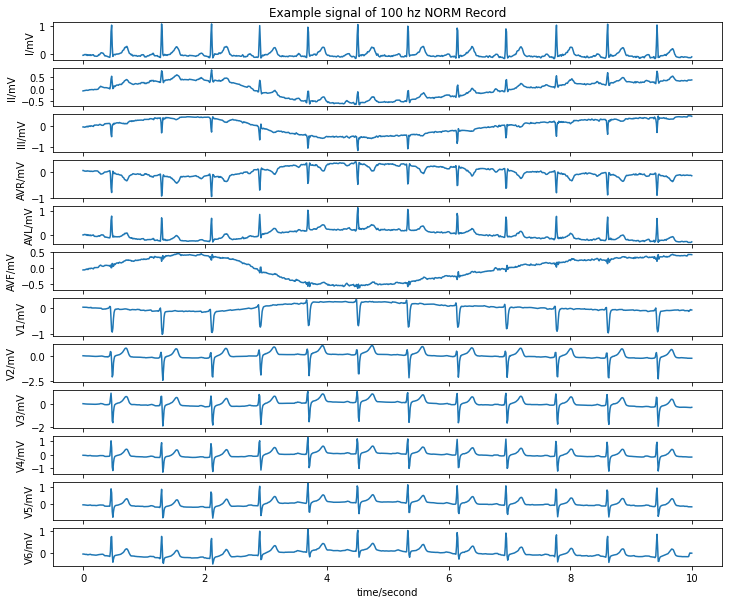

In [ ]:
record100 = rdrecord("/content/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/records100/00000/00008_lr")
plot_wfdb(record=record100, title='Example signal of 100 hz NORM Record', figsize=(12,10))

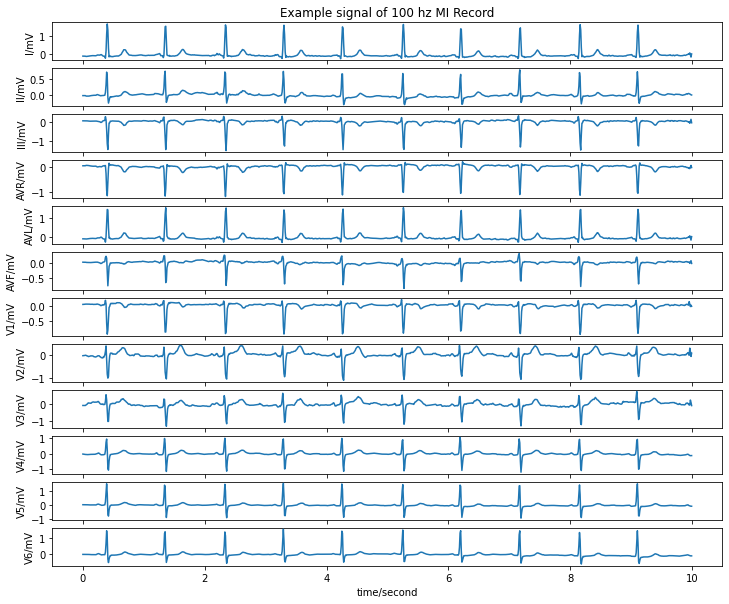

In [ ]:
record100 = rdrecord("/content/gdrive/MyDrive/CardiacAbnormalityTransformerProject/physionet.org/files/ptb-xl/1.0.2/records100/00000/00007_lr")
plot_wfdb(record=record100, title='Example signal of 100 hz MI Record', figsize=(12,10))

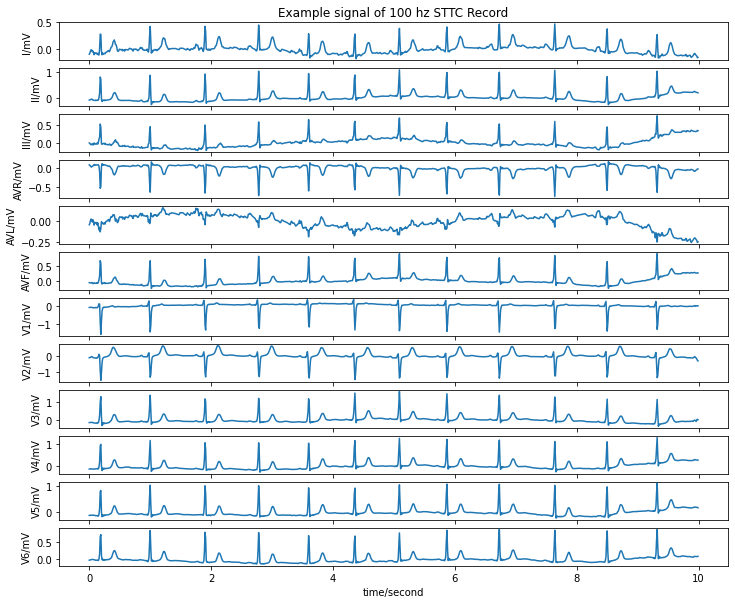

In [ ]:
record100 = rdrecord("/content/gdrive/MyDrive/CardiacAbnormalityTransformerProject/physionet.org/files/ptb-xl/1.0.2/records100/00000/00021_lr")
plot_wfdb(record=record100, title='Example signal of 100 hz STTC Record', figsize=(12,10))

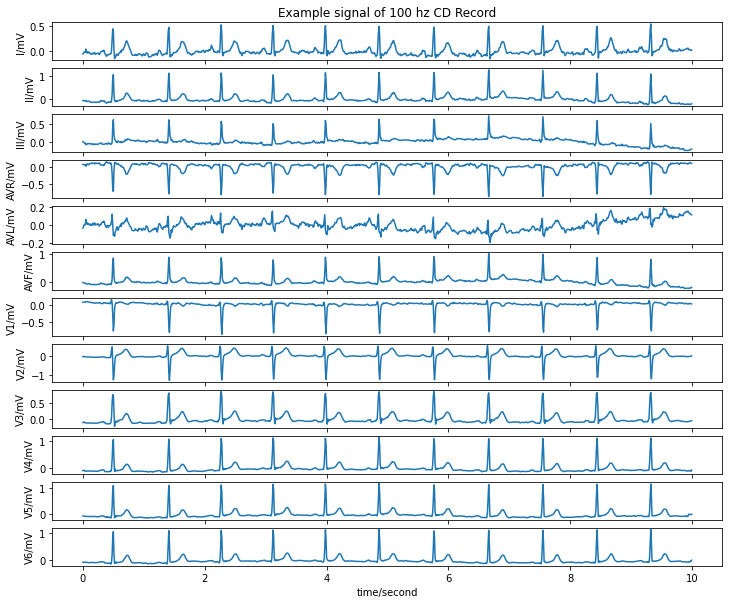

In [ ]:
record100 = rdrecord("/content/gdrive/MyDrive/CardiacAbnormalityTransformerProject/physionet.org/files/ptb-xl/1.0.2/records100/00000/00031_lr")
plot_wfdb(record=record100, title='Example signal of 100 hz CD Record', figsize=(12,10))

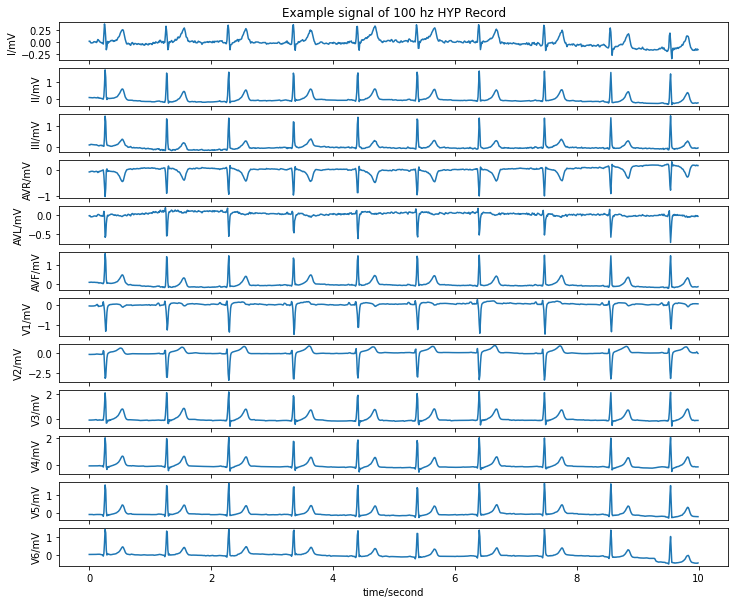

In [ ]:
record100 = rdrecord("/content/gdrive/MyDrive/CardiacAbnormalityTransformerProject/physionet.org/files/ptb-xl/1.0.2/records100/00000/00095_lr")
plot_wfdb(record=record100, title='Example signal of 100 hz HYP Record', figsize=(12,10))